# Polynomial Regression

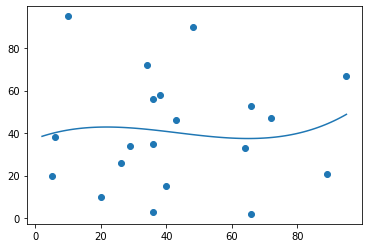

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

model = np.poly1d(np.polyfit(x, y, 3))

line = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

In [4]:
# R-squared for bad fit
import numpy as np
from sklearn.metrics import r2_score

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, model(x)))

0.009952707566680652


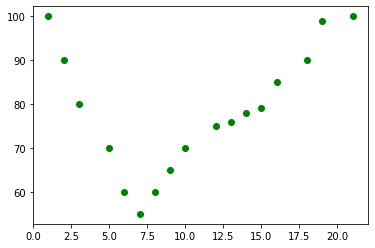

In [10]:
# step 01- Data
x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21]
y = [100, 90, 80, 70, 60, 55, 60, 65, 70, 75, 76, 78, 79, 85, 90, 99, 100]

plt.scatter(x, y, color= 'green')
plt.show()

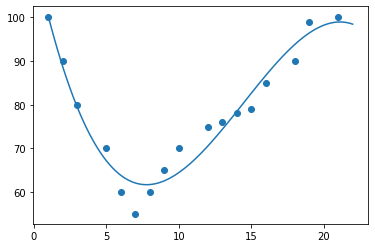

In [12]:
# step 02- Draw the line

my_model = np.poly1d(np.polyfit(x, y, 3))

my_line = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(my_line, my_model(my_line))
plt.show()

In [13]:
# step 03- R-Squared

print(r2_score(y, my_model(x)))

0.9456997871536073


In [14]:
# Step 04- Predictions

speed = my_model(20)
print(speed)

98.20608731609087


# Hands-On Example

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# importing the dataset
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
# Selection of features and target variable
X = df.iloc[:, 1:2]
y = df.iloc[:, -1:]

In [19]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [20]:
y.head()

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000


In [21]:
# for model training, split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# checking if the linear regression fits to the dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

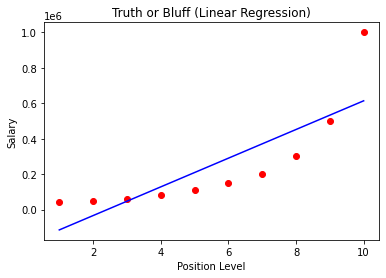

In [23]:
def viz_linear():
    plt.scatter(X, y, color="Red")
    plt.plot(X, model.predict(X), color="blue")
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_linear()

This means that linear regression does not fit the situation, so it's predictions will be completely wrong.

In [32]:
# Fitting Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression().fit(X_poly, y)

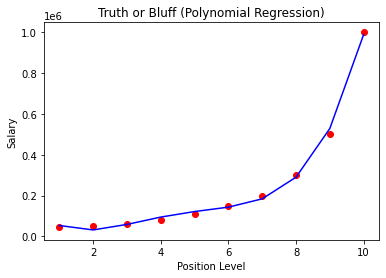

In [33]:
# Visualizing the polynomial regression results
def viz_polynomial():
    plt.scatter(X, y, color="Red")
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color="blue")
    plt.title("Truth or Bluff (Polynomial Regression)")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_polynomial()
    

In [34]:
# predicting a new result with linear regression
lin_pred = model.predict([[11]])
lin_pred

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[694333.33333333]])

In [39]:
# predicting a new result with polynomial regression
pol_pred = pol_reg.predict(poly_reg.fit_transform([[11]]))
pol_pred

array([[1780833.33333359]])

In [40]:
print("Linear Regression Results     = ", lin_pred)
print("Polynomial Regression Results = ", pol_pred)

print("The Difference is             = ", pol_pred - lin_pred)

Linear Regression Results     =  [[694333.33333333]]
Polynomial Regression Results =  [[1780833.33333359]]
The Difference is             =  [[1086500.00000025]]
